In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./dataset_phishing.csv')

In [4]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
df = df.drop(columns = ['url'])

In [9]:
X = df.drop(columns = ['status'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [11]:
y = df['status']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11430 entries, 0 to 11429
Series name: status
Non-Null Count  Dtype 
--------------  ----- 
11430 non-null  object
dtypes: object(1)
memory usage: 89.4+ KB


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size=0.30)

In [16]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(8001, 87) (8001,)


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtc = DecisionTreeClassifier(max_depth = 9)

In [80]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [81]:
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
print(confusion_matrix(y_test, y_pred))

[[1545  103]
 [ 110 1671]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  legitimate       0.93      0.94      0.94      1648
    phishing       0.94      0.94      0.94      1781

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



In [85]:
accuracy = accuracy_score(y_test, y_pred)

In [86]:
print(f"Decision tree Accuracy: {accuracy:.4f}")

Decision tree Accuracy: 0.9379


In [87]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns)

In [88]:
features.head(87)

,0
length_url,0.004091
length_hostname,0.003639
ip,0.000000
nb_dots,0.000541
nb_hyphens,0.008173
...,...
domain_age,0.011217
web_traffic,0.024950
dns_record,0.000000
google_index,0.589277


In [89]:
error_rate = []

for i in range(1,30):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [90]:
import matplotlib.pyplot as PyPlot

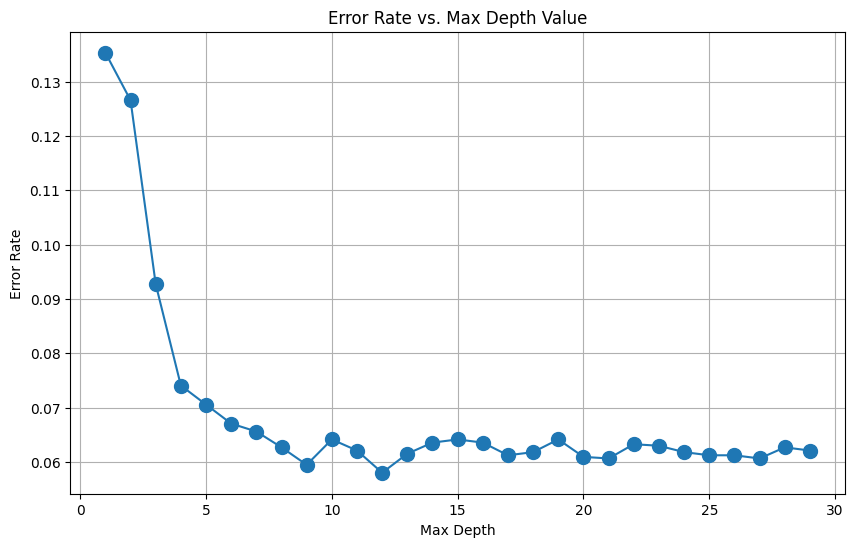

In [91]:
PyPlot.figure(figsize=(10,6))
PyPlot.plot(range(1,30), error_rate, marker='o', markersize=10)
PyPlot.title('Error Rate vs. Max Depth Value')
PyPlot.xlabel('Max Depth')
PyPlot.ylabel('Error Rate')
PyPlot.grid()

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(
    n_estimators = 10,
    criterion = "gini",
    max_depth = 9,
    max_samples=0.8,
    random_state=21)

In [95]:
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

In [96]:
print(confusion_matrix(y_test, y_rf_pred))

[[1578   70]
 [  97 1684]]


In [97]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

  legitimate       0.94      0.96      0.95      1648
    phishing       0.96      0.95      0.95      1781

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



In [98]:
accuracy_rf = accuracy_score(y_test, y_rf_pred)

In [99]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9513
